<a href="https://colab.research.google.com/github/MatthewPelter/BCS109/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matthew Pelter Final Project

#Student Data:
The following dataset contains a multitude of data for students. We will research and discover the factors that affect grades the most in order to enhance the schools teaching methods. We are going to also see if we can predict grades based on the data given.

### Attributes for student-mat.csv (Math course) dataset:
- 1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
- 2 sex - student's sex (binary: "F" - female or "M" - male)
- 3 age - student's age (numeric: from 15 to 22)
- 4 address - student's home address type (binary: "U" - urban or "R" - rural)
- 5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- 6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
- 7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- 8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- 9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- 10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- 11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- 12 guardian - student's guardian (nominal: "mother", "father" or "other")
- 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- 16 schoolsup - extra educational support (binary: yes or no)
- 17 famsup - family educational support (binary: yes or no)
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- 19 activities - extra-curricular activities (binary: yes or no)
- 20 nursery - attended nursery school (binary: yes or no)
- 21 higher - wants to take higher education (binary: yes or no)
- 22 internet - Internet access at home (binary: yes or no)
- 23 romantic - with a romantic relationship (binary: yes or no)
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
- 30 absences - number of school absences (numeric: from 0 to 93)

#### these grades are related with the course subject, Math or Portuguese:
- 31 G1 - first period grade (numeric: from 0 to 20)
- 31 G2 - second period grade (numeric: from 0 to 20)
- 32 G3 - final grade (numeric: from 0 to 20, output target)



---


Additional note: there are several (382) students that belong to both datasets. 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

In [54]:
# Importing the data to be analyzed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

df = pd.read_csv("https://raw.githubusercontent.com/MatthewPelter/BCS109/master/student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [28]:
# Checking for any null values
df.isnull().sum

<bound method DataFrame.sum of      school    sex    age  address  ...  absences     G1     G2     G3
0     False  False  False    False  ...     False  False  False  False
1     False  False  False    False  ...     False  False  False  False
2     False  False  False    False  ...     False  False  False  False
3     False  False  False    False  ...     False  False  False  False
4     False  False  False    False  ...     False  False  False  False
..      ...    ...    ...      ...  ...       ...    ...    ...    ...
390   False  False  False    False  ...     False  False  False  False
391   False  False  False    False  ...     False  False  False  False
392   False  False  False    False  ...     False  False  False  False
393   False  False  False    False  ...     False  False  False  False
394   False  False  False    False  ...     False  False  False  False

[395 rows x 33 columns]>

In [29]:
# Check for empty data.
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [30]:
# Checking for unique values in each column.
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [31]:
# Fetching the basic statistics and analysis of our data.
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [32]:
# Checking the data type for the values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### The three graphs below show where most of the grades fall into for G1-G3. We see that a majority of students got a grade 10.

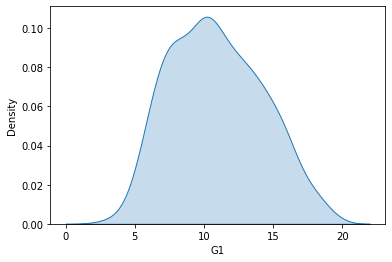

In [14]:
sns.kdeplot(data=df, x='G1', fill=True)

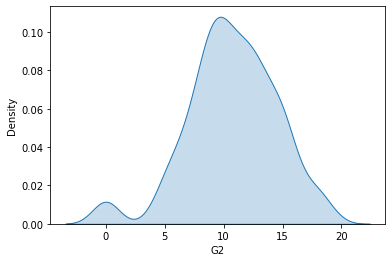

In [15]:
sns.kdeplot(data=df, x='G2', fill=True)

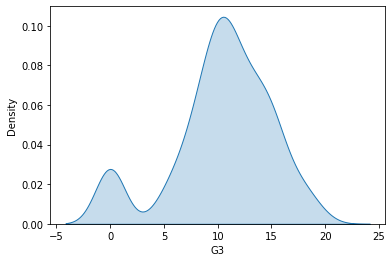

In [16]:

sns.kdeplot(data=df, x='G3', fill=True)

### Heatmap
In the heatmap, we see what variables are correlated.
As we see, the darker the box, the more correlated they are. 
To verify this chart is accurate, we see that failures are strongly correlated with grades because a low grade will cause you to fail.

An interesting point noticed was the alcoholic consumption also has a strong impact on the grades but not failures which tells me that grades are impacted but they are not failing becuase of it.

Another interesting point is how travel time from home to school also impacts a students grades. It is something I never really thought of which needs to be investigated more.

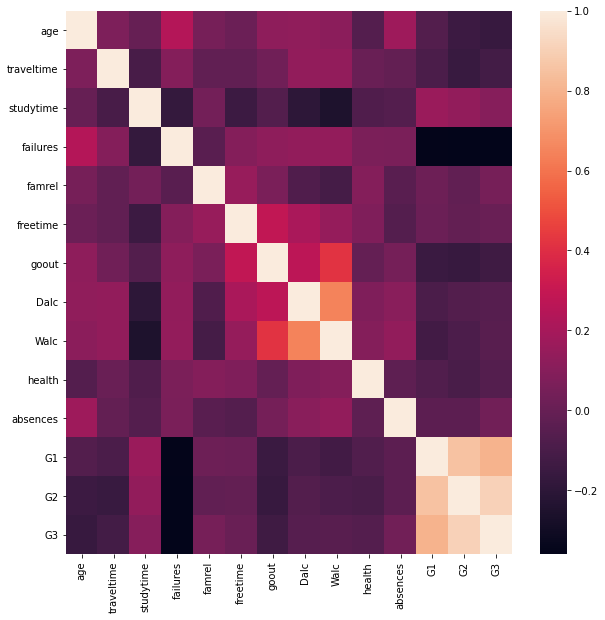

In [36]:
df2 = df.drop(['school', 'address', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason'], axis=1)
plt.figure(figsize=(10, 10))
corrMatrix = df2.corr()
sns.heatmap(corrMatrix)
plt.show()

### Line plot
The three line plots show the relation between travel time from home to school and the grades. We see that the further away they are and the longer the time is to school, the lower the grades they receive.

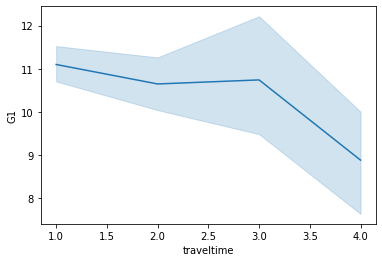

In [37]:
sns.lineplot(data=df, x="traveltime", y="G1")

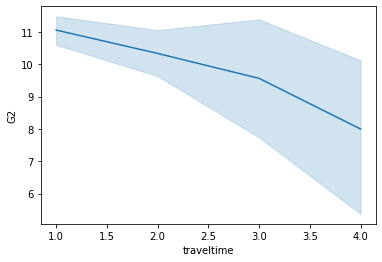

In [38]:
sns.lineplot(data=df, x="traveltime", y="G2")

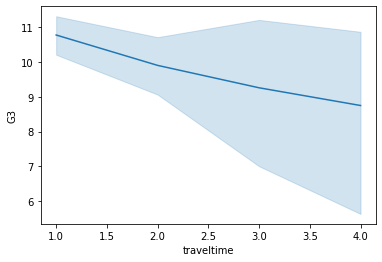

In [39]:
sns.lineplot(data=df, x="traveltime", y="G3")

### Bar plot
The bar plot is used to display the relation between failures and whether or not the student performs in after school activities. We see that students who do not take part in activities do have more failures. What is interesting is that males that do not participate in activities have more failures than females, but females that participate in activities have more failures than males.

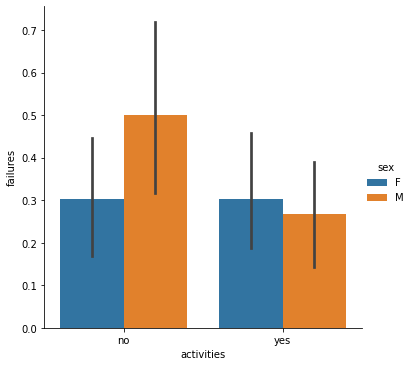

In [47]:
sns.catplot(x="activities", y="failures", hue="sex", kind="bar", data=df)

### Regression
We will now see if we can predict the students grades based on the data given using a linear regression.

In [51]:
df3 = df[["G1", "G2", "G3", "traveltime", "freetime", "studytime", "failures", "absences"]]
df3.head()

,G1,G2,G3,traveltime,freetime,studytime,failures,absences
0,5,6,6,2,3,2,0,6
1,5,5,6,1,3,2,0,4
2,7,8,10,1,3,2,3,10
3,15,14,15,1,2,3,0,2
4,6,10,10,1,3,2,0,4


In [61]:
predict = "G3"

X = np.array(df3.drop([predict], 1)) # Features
y = np.array(df3[predict]) # Labels

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)

#acc = linear.score(x_test, y_test) # accuracy 
#print(acc)

predictions = linear.predict(x_test) # Gets a list of all predictions

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

12.563208028197954 [10 13  4  3  4  0  6] 13
15.152571605311262 [14 15  1  5  2  0  0] 15
13.865014285849362 [12 14  1  4  1  0  0] 15
7.919769419579541 [7 9 1 3 2 0 0] 8
5.809544977862158 [7 7 1 3 3 0 0] 8
15.496655509088313 [15 15  1  4  2  0 10] 15
11.318249156147225 [12 12  2  2  4  0  1] 12
14.886128200387759 [13 15  2  3  2  0  2] 16
8.85852708336297 [10  9  1  4  2  0 10] 10
9.734802773584294 [10 10  2  3  1  0  4] 10
12.012510979262277 [15 12  2  3  3  0  0] 14
4.976396452884698 [6 7 1 3 2 3 0] 0
3.418057103746861 [6 5 1 3 3 1 0] 0
13.491863568234027 [15 13  1  4  2  0  9] 15
17.694259825890004 [16 17  1  5  1  0  4] 18
11.770339740090973 [14 12  1  4  2  1  0] 12
12.175157852373399 [12 12  1  4  1  0  8] 12
9.552318639625804 [10 10  1  3  1  0  2] 10
13.034727968263066 [14 13  1  4  3  1 12] 13
12.958841891032517 [13 13  3  3  2  0  0] 13
5.498964363684835 [7 7 2 2 2 2 4] 9
8.421218866747193 [9 9 1 3 2 0 6] 10
9.971709097817294 [12 10  1  2  2  0 14] 11
11.384659017026335 [10 

No handles with labels found to put in legend.


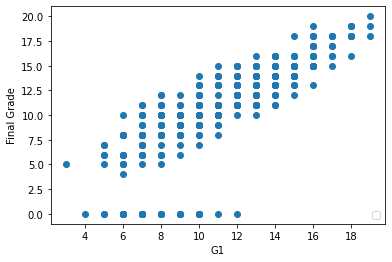

In [64]:
plot = "G1" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(df3[plot], df3["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

### Conclude Regression
To conclude our regression, we can accurately predict the third grade from our dataset. We were getting very accurate results using the G1, G2, traveltime, freetime, studytime, failures, and absences.

#Conclusion
To sum up our research, we were able to explore the relations between grades and a multitude of different variables. What really intrigued me was the relation between traveltime and grades. Must be something psychological that would cause that. Also, with our useful data, I was able to make predictions of grades which can be used to prevent students from failing. Overall, the point of this research was to determine why students are failing and hopefully present ways to help prevent them from failing.